In [74]:
import pandas as pd

In [75]:
df=pd.read_csv('../data/output/development_sample_cleaned_categorical.csv') 
df.head() 

,ID,customer_id,Var1,Var4,Var5,Var6,Var7,Var15,Var16,Var23,...,income,loan_desc,Var8_q,Var25_q,Var26_q,Var20_1,Var21_1,Var22_1,Var17_1,working_months_1
0,11034977,32537148,1,2,9,1,0,0,0,1,...,1,3,10.0,3.0,0.0,1,1,1,3,2
1,11034978,32761663,1,3,9,1,0,4,4,0,...,0,1,0.0,3.0,1.0,0,0,0,0,5
2,11034979,32701063,2,0,2,1,0,0,0,2,...,5,5,10.0,3.0,0.0,1,1,1,5,9
3,11034980,32386786,3,3,5,6,9,0,0,0,...,2,2,0.0,1.0,4.0,0,0,0,1,9
4,11034982,32861919,1,2,6,1,0,1,1,2,...,0,4,10.0,0.0,10.0,0,1,1,0,4


In [76]:
# calculate WOE for each category
def calculate_woe(df, feature, target):

    df = df[[feature, target]]
    df['non_target'] = 1 - df[target]

    total_non_target = df['non_target'].sum()
    total_target = df[target].sum()

    df = df.groupby(feature).agg({target: 'sum', 'non_target': 'sum'}).reset_index()

    df['total_target'] = total_target
    df['total_non_target'] = total_non_target

    df['woe'] = (df['non_target'] / total_non_target) / (df[target] / total_target)
    df['iv'] = (df['non_target'] / total_non_target - df[target] / total_target) * df['woe']

    df.rename(columns = {feature:'category'}, inplace = True)
    df['variable'] = feature

    # Move the variable column to the front
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]

    return df

In [77]:
columns_to_calc_woe = df.columns
columns_to_calc_woe = columns_to_calc_woe.drop(['target', 'ID', 'customer_id'])

In [78]:
columns_to_calc_woe

Index(['Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var23',
       'Var24', 'Var29', 'Var30', 'Var2', 'Var3', 'Var11', 'Var12', 'Var14',
       'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q',
       'Var20_1', 'Var21_1', 'Var22_1', 'Var17_1', 'working_months_1'],
      dtype='object')

In [79]:
# define dataframe to store WOE values
df_woe_all = pd.DataFrame()

for col in columns_to_calc_woe:
    df_woe = calculate_woe(df, col, 'target')
    df_woe_all = pd.concat([df_woe_all, df_woe], axis=0)

/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_61383/2911622210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['non_target'] = 1 - df[target]
/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_61383/2911622210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['non_target'] = 1 - df[target]
/var/folders/rh/w6cl6rd95vj2g4s03scz_4fc0000gn/T/ipykernel_61383/2911622210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [80]:
df_woe_all

,variable,category,target,non_target,total_target,total_non_target,woe,iv
0,Var1,1.0,867.0,26388.0,1101.0,34599.0,0.968526,-0.024005
1,Var1,2.0,169.0,5957.0,1101.0,34599.0,1.121669,0.020948
2,Var1,3.0,46.0,1584.0,1101.0,34599.0,1.095774,0.004385
3,Var1,4.0,19.0,670.0,1101.0,34599.0,1.122135,0.002365
0,Var4,0.0,152.0,3615.0,1101.0,34599.0,0.756813,-0.025409
...,...,...,...,...,...,...,...,...
5,working_months_1,5.0,138.0,3461.0,1101.0,34599.0,0.798080,-0.020198
6,working_months_1,6.0,111.0,3442.0,1101.0,34599.0,0.986760,-0.001317
7,working_months_1,7.0,100.0,3548.0,1101.0,34599.0,1.129035,0.013232
8,working_months_1,8.0,101.0,3356.0,1101.0,34599.0,1.057364,0.005564


In [81]:
# sum IV grouped by variable
df_iv = df_woe_all.groupby('variable').agg({'iv': 'sum'}).reset_index()

In [82]:
# order by IV
df_iv = df_iv.sort_values('iv', ascending=False)
df_iv

,variable,iv
1,Var11,0.237090
16,Var28,0.159687
14,Var26_q,0.122043
26,loan_desc,0.111645
25,income,0.091549
17,Var29,0.067985
3,Var14,0.062022
13,Var25_q,0.060927
15,Var27,0.056081
7,Var2,0.052123


In [83]:
df_iv.to_csv('../data/output/WOE_variables.csv', index = False)

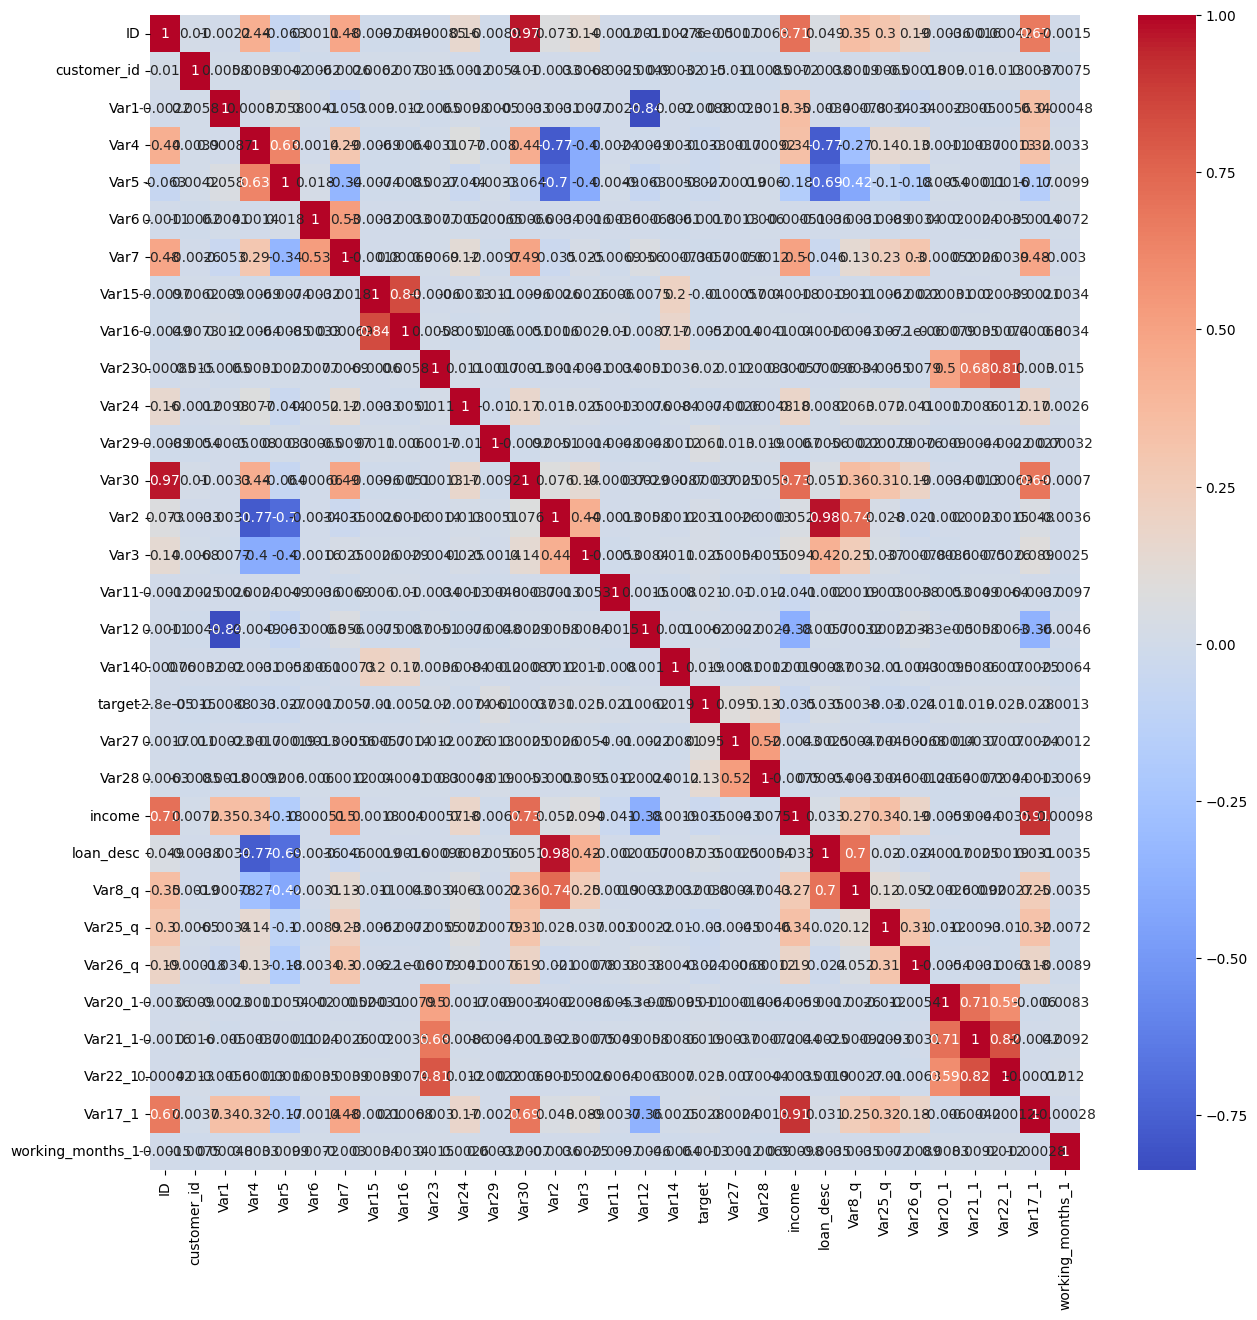

In [84]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Coarse classing basing on WOE
df_woe_all['woe'] = df_woe_all['woe'].round(2)




## Collinearity

Usunąć zmienne wysoce skorelowane ze sobą
- do decyzji które
- czy powyej 50%?

In [58]:
var_to_check = df.columns
var_to_check = var_to_check.drop(['target', 'ID', 'customer_id'])
# Step 2: Remove duplicates
var_to_check = list(set(var_to_check))

var_to_check

Index(['Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var23',
       'Var24', 'Var29', 'Var30', 'Var2', 'Var3', 'Var11', 'Var12', 'Var14',
       'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q',
       'Var20_1', 'Var21_1', 'Var22_1', 'Var17_1', 'working_months_1'],
      dtype='object')

In [62]:
# Step 4: Subset the dataset
df_kor = df[var_to_check]

In [63]:
import pandas as pd
from scipy.stats import kendalltau

# Step 5: Calculate Kendall's tau-b correlation coefficient
kendall_corr = df_kor.corr(method='kendall')

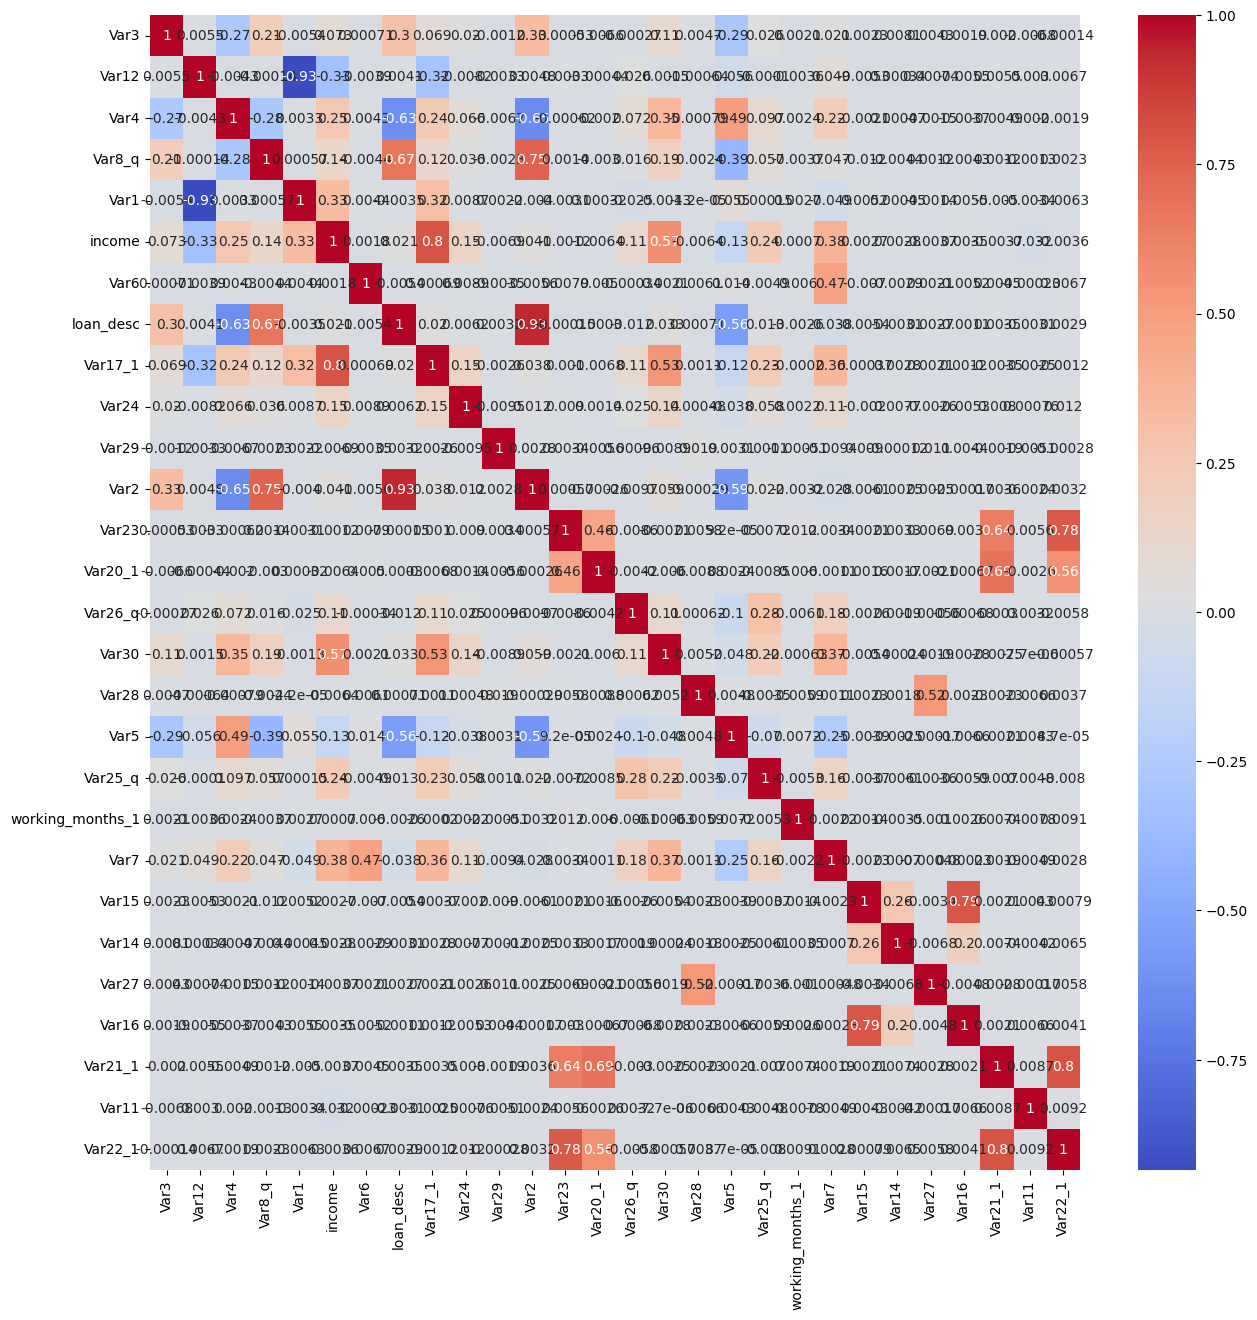

In [67]:
# Visualize the correlation matrix from kendall_corr
plt.figure(figsize=(15, 15))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm')
plt.show()

In [68]:
import numpy as np

# Filter the correlation matrix to include only upper triangular part
upper_triangular = np.triu(kendall_corr, k=1)

In [69]:
# Flatten the upper triangular part to get a 1D array
filtered_corr = upper_triangular[(upper_triangular > 0.5) & (upper_triangular != 1)]

# Display the filtered correlation values
print(filtered_corr)

[0.66898785 0.7490049  0.80064745 0.56861119 0.93419736 0.53250865
 0.64180634 0.779653   0.68830457 0.55812703 0.52293085 0.79131796
 0.80079439]


In [72]:
# Create a mask for the condition
mask = (upper_triangular > 0.5) & (upper_triangular < 1)

# Get the indices (row and column) where the condition is satisfied
indices = np.where(mask)

indices

(array([ 3,  3,  5,  5,  7,  8, 12, 12, 13, 13, 16, 21, 25]),
 array([ 7, 11,  8, 15, 11, 15, 25, 27, 25, 27, 23, 24, 27]))